import libraries

In [41]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# read data 
df = pd.read_csv('E0.csv')
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA
0,E0,16/08/2024,20:00,Man United,Fulham,1,0,H,0,0,...,1.86,2.07,1.83,2.11,1.88,2.11,1.82,2.05,1.90,2.08
1,E0,17/08/2024,12:30,Ipswich,Liverpool,0,2,A,0,0,...,2.05,1.88,2.04,1.90,2.20,2.00,1.99,1.88,2.04,1.93
2,E0,17/08/2024,15:00,Arsenal,Wolves,2,0,H,1,0,...,2.02,1.91,2.00,1.90,2.05,1.93,1.99,1.87,2.02,1.96
3,E0,17/08/2024,15:00,Everton,Brighton,0,3,A,0,1,...,1.87,2.06,1.86,2.07,1.92,2.10,1.83,2.04,1.88,2.11
4,E0,17/08/2024,15:00,Newcastle,Southampton,1,0,H,1,0,...,1.87,2.06,1.88,2.06,1.89,2.10,1.82,2.05,1.89,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,E0,13/04/2025,14:00,Liverpool,West Ham,2,1,H,1,0,...,2.07,1.86,2.05,1.86,2.07,1.88,2.02,1.85,2.07,1.91
316,E0,13/04/2025,14:00,Wolves,Tottenham,4,2,H,2,0,...,2.01,1.92,2.00,1.93,2.02,1.94,1.98,1.89,2.01,1.97
317,E0,13/04/2025,16:30,Newcastle,Man United,4,1,H,1,1,...,2.05,1.88,2.05,1.88,2.10,1.95,2.02,1.85,2.09,1.90
318,E0,14/04/2025,20:00,Bournemouth,Fulham,1,0,H,1,0,...,1.91,1.99,1.93,1.99,2.01,1.99,1.93,1.94,1.97,2.00


#Data is for the Premier league from 2024 to 2024 season. 
#Dataset is divided according:
#Match outcome (Home Win/Draw/Away Win - FTR)
#Goal-based predictions (Over/Under goals, exact score - FTHG, FTAG)
##Match outcome (Home Win/Draw/Away Win - FTR)
#Goal-based predictions (Over/Under goals, exact score - FTHG, FTAG)

We will analyize Match outcome (Home Win/Draw/Away Win - FTR)
 and 
Goal-based predictions (Over/Under goals, exact score - FTHG, FTAG)

In [43]:
df = df.head(50)
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA
0,E0,16/08/2024,20:00,Man United,Fulham,1,0,H,0,0,...,1.86,2.07,1.83,2.11,1.88,2.11,1.82,2.05,1.90,2.08
1,E0,17/08/2024,12:30,Ipswich,Liverpool,0,2,A,0,0,...,2.05,1.88,2.04,1.90,2.20,2.00,1.99,1.88,2.04,1.93
2,E0,17/08/2024,15:00,Arsenal,Wolves,2,0,H,1,0,...,2.02,1.91,2.00,1.90,2.05,1.93,1.99,1.87,2.02,1.96
3,E0,17/08/2024,15:00,Everton,Brighton,0,3,A,0,1,...,1.87,2.06,1.86,2.07,1.92,2.10,1.83,2.04,1.88,2.11
4,E0,17/08/2024,15:00,Newcastle,Southampton,1,0,H,1,0,...,1.87,2.06,1.88,2.06,1.89,2.10,1.82,2.05,1.89,2.10
5,E0,17/08/2024,15:00,Nott'm Forest,Bournemouth,1,1,D,1,0,...,1.94,1.99,1.94,1.98,2.05,2.00,1.93,1.93,1.96,2.02
6,E0,17/08/2024,17:30,West Ham,Aston Villa,1,2,A,1,1,...,1.83,2.10,1.85,2.09,1.86,2.14,1.82,2.08,1.84,2.18
7,E0,18/08/2024,14:00,Brentford,Crystal Palace,2,1,H,1,0,...,2.07,1.86,2.06,1.88,2.11,1.88,2.05,1.85,2.07,1.92
8,E0,18/08/2024,16:30,Chelsea,Man City,0,2,A,0,1,...,1.94,1.99,1.96,1.97,1.96,2.00,1.90,1.96,1.93,2.07
9,E0,19/08/2024,20:00,Leicester,Tottenham,1,1,D,0,1,...,2.03,1.90,2.02,1.91,2.06,1.92,1.99,1.87,2.03,1.96


C:\Users\1231\AppData\Local\Temp\ipykernel_17528\457299843.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ftr_counts.index, y=ftr_counts.values, palette="viridis")


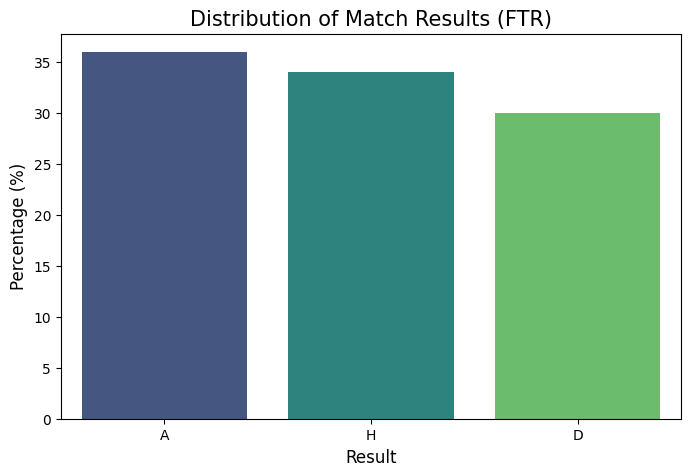

In [44]:
# Count outcomes
ftr_counts = df["FTR"].value_counts(normalize=True) * 100

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=ftr_counts.index, y=ftr_counts.values, palette="viridis")
plt.title("Distribution of Match Results (FTR)", fontsize=15)
plt.xlabel("Result", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.show()

home games are have a higher pecentage in terms of winning(40%-50%), away games are 5% less likely and draws are distributed negative 15% in 40 games.

 Home/Away Goals Analysis

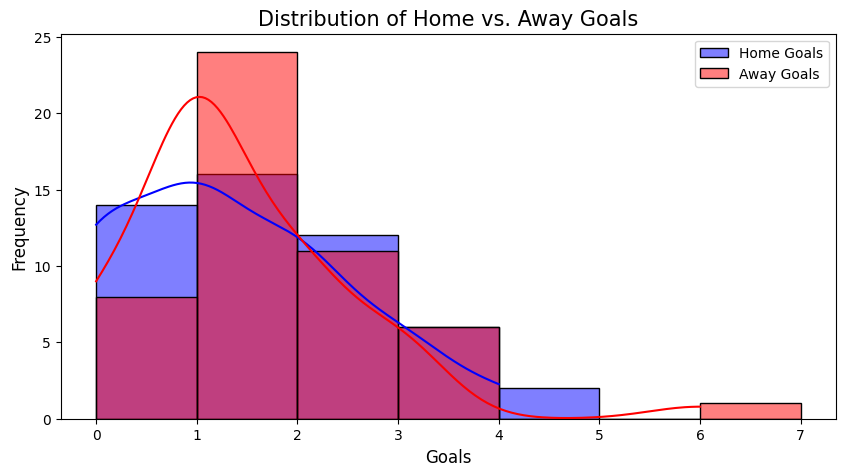

In [45]:
# Average goals
avg_home_goals = df["FTHG"].mean()
avg_away_goals = df["FTAG"].mean()

# Plot distributions
plt.figure(figsize=(10, 5))
sns.histplot(df["FTHG"], bins=range(8), color="blue", label="Home Goals", kde=True)
sns.histplot(df["FTAG"], bins=range(8), color="red", label="Away Goals", kde=True)
plt.legend()
plt.title("Distribution of Home vs. Away Goals", fontsize=15)
plt.xlabel("Goals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

Since Home and aways games yeild more predicted wins. In home games the is a high average of a team scoring 0-1 goals at 60-80. In away games teams have a higer average in scoring 1 -3 goals, even though the is a lower distribution home teams do score 3-4 goal having an average of 20-40. (1.5 vs 1.1 bet terms)

 Over/Under Goals Analysis

C:\Users\1231\AppData\Local\Temp\ipykernel_17528\3453985392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalGoals"] = df["FTHG"] + df["FTAG"]
C:\Users\1231\AppData\Local\Temp\ipykernel_17528\3453985392.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Over_{thresh}"] = df["TotalGoals"] > thresh
C:\Users\1231\AppData\Local\Temp\ipykernel_17528\3453985392.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

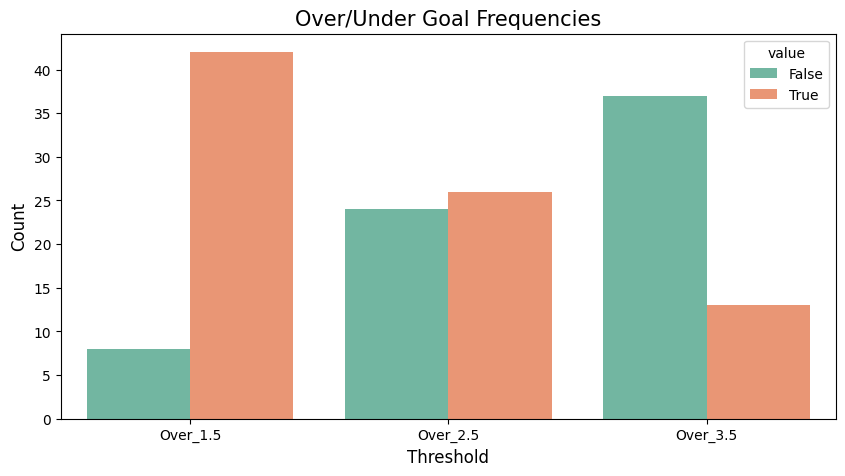

In [47]:
# Total goals per match
df["TotalGoals"] = df["FTHG"] + df["FTAG"]

# Over/Under thresholds
thresholds = [1.5, 2.5, 3.5]
for thresh in thresholds:
    df[f"Over_{thresh}"] = df["TotalGoals"] > thresh

# Plot Over/Under frequencies
plt.figure(figsize=(10, 5))
sns.countplot(data=df.melt(value_vars=[f"Over_{thresh}" for thresh in thresholds]), 
              x="variable", hue="value", palette="Set2")
plt.title("Over/Under Goal Frequencies", fontsize=15)
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

most bets follw under 2.5

 Heatmap (Numeric Columns)

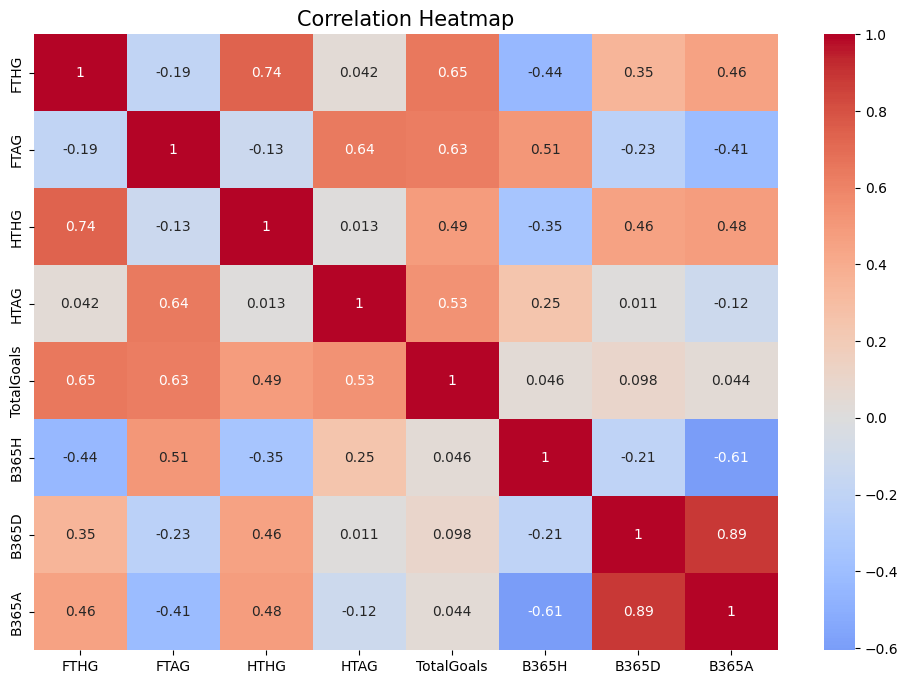

In [48]:
# Select numeric columns
numeric_cols = ["FTHG", "FTAG", "HTHG", "HTAG", "TotalGoals", "B365H", "B365D", "B365A"]
corr = df[numeric_cols].corr()

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap", fontsize=15)
plt.show()

FTHG and HTHG are strongly correlated (home goals in 1st/2nd halves).

Betting odds (B365H, B365A) negatively correlate with goals (lower odds = higher probability).

Odds vs. Actual Outcomes

In [49]:
# Compare implied odds vs. actual results
df["Implied_H"] = 1 / df["B365H"]
df["Implied_A"] = 1 / df["B365A"]
actual_home_win_rate = (df["FTR"] == "H").mean()

print(f"Implied Home Win Probability: {df['Implied_H'].mean():.2f}")
print(f"Actual Home Win Rate: {actual_home_win_rate:.2f}")

Implied Home Win Probability: 0.48
Actual Home Win Rate: 0.34


C:\Users\1231\AppData\Local\Temp\ipykernel_17528\2792468870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Implied_H"] = 1 / df["B365H"]
C:\Users\1231\AppData\Local\Temp\ipykernel_17528\2792468870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Implied_A"] = 1 / df["B365A"]


Implied Home Win Probability: 0.48.
Actual Home Win Rate: 0.34.

If Implied_H > Actual, bookmakers may overestimate home wins (potential value bets).

Advanced Visualizations

C:\Users\1231\AppData\Local\Temp\ipykernel_17528\3943944403.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_goals.values, y=home_goals.index, ax=axes[0], palette="Blues_d")
C:\Users\1231\AppData\Local\Temp\ipykernel_17528\3943944403.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=away_goals.values, y=away_goals.index, ax=axes[1], palette="Reds_d")


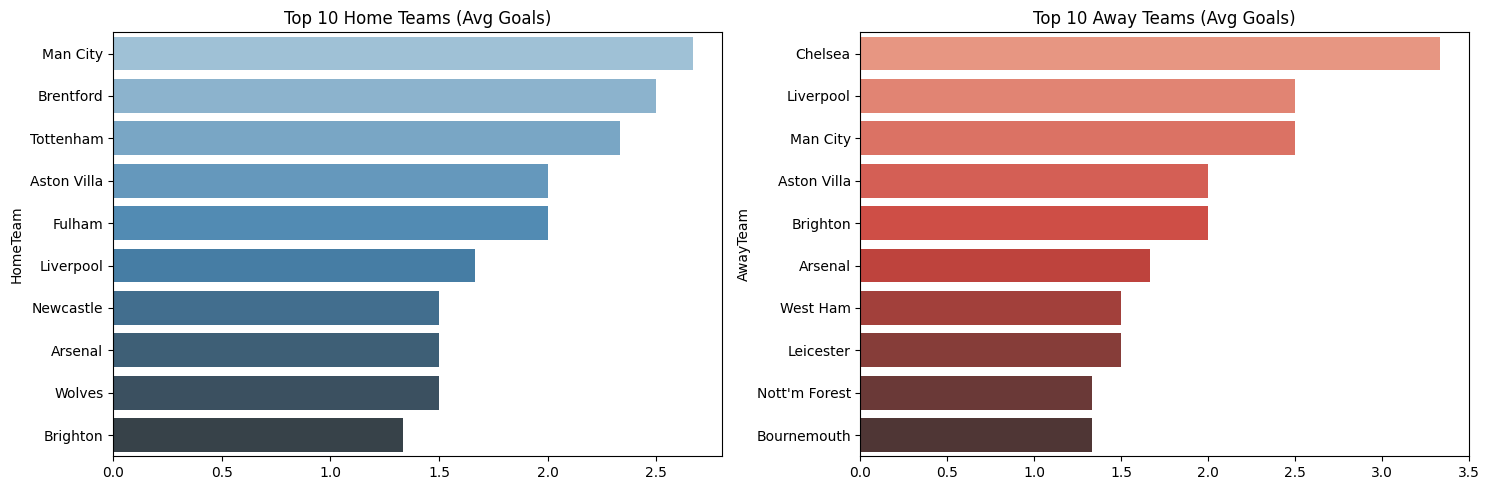

In [50]:
# Aggregate goals by team
home_goals = df.groupby("HomeTeam")["FTHG"].mean().sort_values(ascending=False)[:10]
away_goals = df.groupby("AwayTeam")["FTAG"].mean().sort_values(ascending=False)[:10]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=home_goals.values, y=home_goals.index, ax=axes[0], palette="Blues_d")
sns.barplot(x=away_goals.values, y=away_goals.index, ax=axes[1], palette="Reds_d")
axes[0].set_title("Top 10 Home Teams (Avg Goals)")
axes[1].set_title("Top 10 Away Teams (Avg Goals)")
plt.tight_layout()
plt.show()

Rolling Average Goals (Trend Analysis)

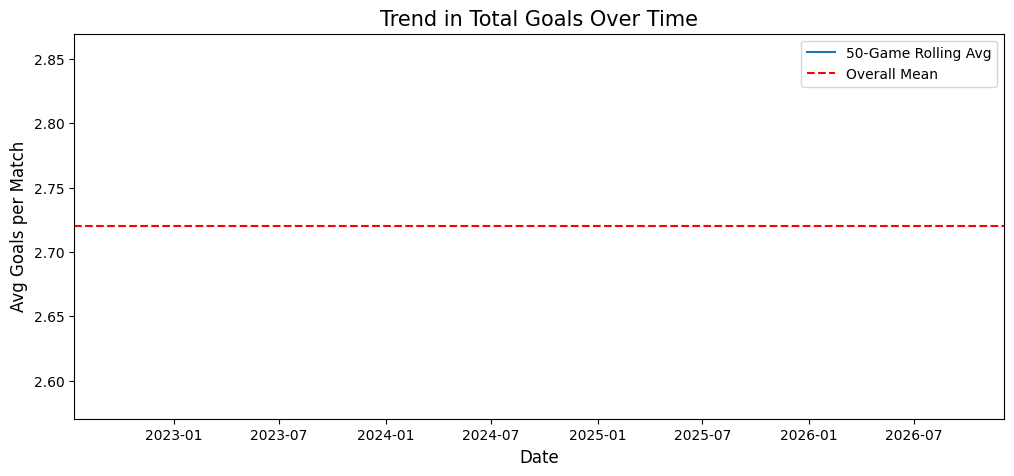

In [52]:
# Rolling average of total goals
df["Date"] = pd.to_datetime(df["Date"])  # Ensure date is datetime
df = df.sort_values("Date")
df["Rolling_Goals"] = df["TotalGoals"].rolling(window=50).mean()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Rolling_Goals"], label="50-Game Rolling Avg")
plt.axhline(df["TotalGoals"].mean(), color="r", linestyle="--", label="Overall Mean")
plt.title("Trend in Total Goals Over Time", fontsize=15)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Avg Goals per Match", fontsize=12)
plt.legend()
plt.show()

Team Strength: Some teams consistently score more (home/away).